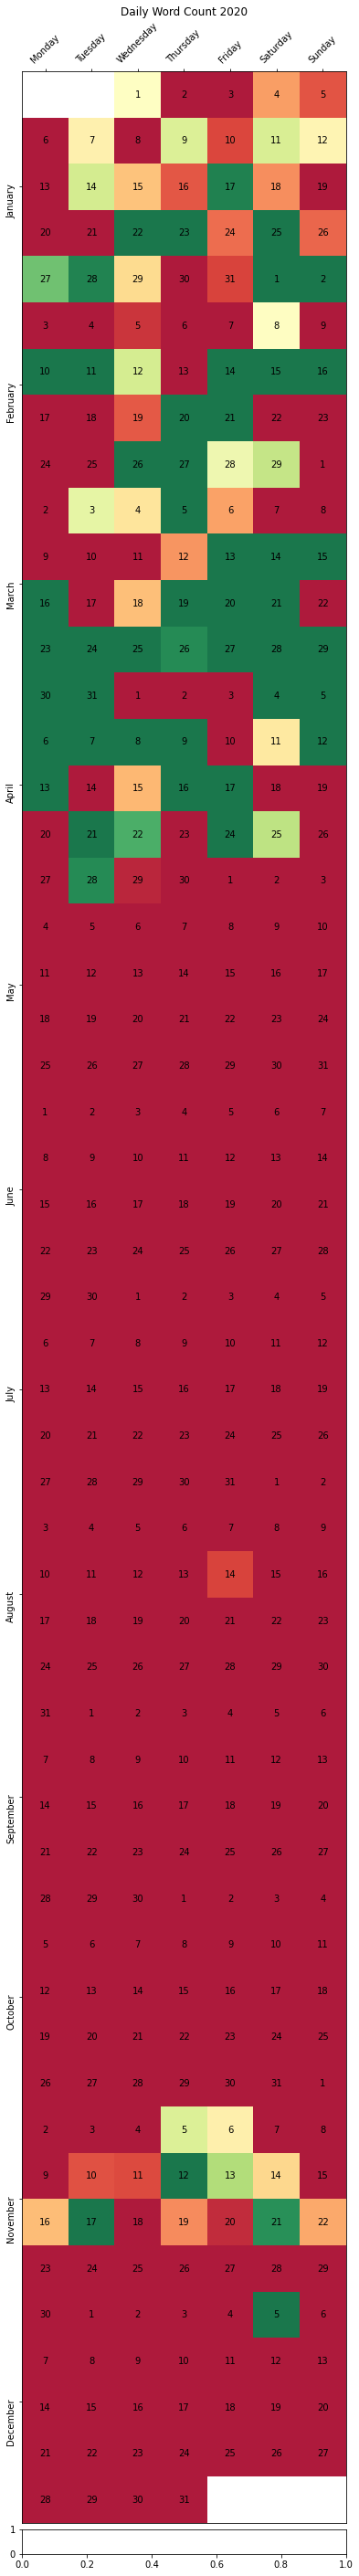

In [3]:
#Example calendar heatmap
#to-do: make the date automatically be correct by counting lines?

import csv 
import datetime as dt
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from mpl_toolkits.axes_grid1 import make_axes_locatable

wordcount = '~/qs/writing/data/DailyWordCount2020.csv'
data = pd.read_csv(wordcount) # make a new examplefile etc. with more up to date data
data = data['Daily Word Count'] #header name

def main():
    dates, data = generate_data()
    fig, ax = plt.subplots(figsize=(7, 50)) # change how big it is
    ax.set_title('Daily Word Count 2020')
    calendar_heatmap(ax, dates, data)
    #plt.show()
    plt.savefig('WordCountHeatMap.png', bbox_inches='tight') #how to export the file to become a png, could make it a pdf instead
    
def generate_data():
    num = 366 # update this to change the days i.e. make it the same number of lines as the data automatically (Not including head)
    # data = np.random.randint(0, 500, num) # to go back to the original
    start = dt.datetime(2020, 1, 1)
    dates = [start + dt.timedelta(days=i) for i in range(num)]
    return dates, data

def calendar_array(dates, data):
    i, j = zip(*[d.isocalendar()[1:] for d in dates])
    i = np.array(i) - min(i)
    j = np.array(j) - 1
    ni = max(i) + 1

    calendar = np.nan * np.zeros((ni, 7))
    calendar[i, j] = data
    return i, j, calendar

def calendar_heatmap(ax, dates, data):
    i, j, calendar = calendar_array(dates, data)
    im = ax.imshow(calendar, interpolation='none', cmap='RdYlGn', vmin=0, vmax=500, alpha=.9) #values of min and max data point i.e. word count range
    label_days(ax, dates, i, j, calendar)
    label_months(ax, dates, i, j, calendar)
    #ax.figure.colorbar(im) #probably have to do something here to change the color bar size
    
    
    #plt.figure()
    #ax = plt.gca()
    #im = ax.imshow(np.arange(0, 500).reshape((50,10)))

    # or create an axes on the "right" side of ax. The width of cax will be 5%
    # of ax and the padding between cax and ax will be fixed at 0.05 inch.
    divider = make_axes_locatable(ax)
    cax = divider.append_axes("bottom", size="1%", pad=0.1)
    #plt.colorbar(im, cax=cax, orientation = 'horizontal')

def label_days(ax, dates, i, j, calendar):
    ni, nj = calendar.shape
    day_of_month = np.nan * np.zeros((ni, 7))
    day_of_month[i, j] = [d.day for d in dates]

    for (i, j), day in np.ndenumerate(day_of_month):
        if np.isfinite(day):
            ax.text(j, i, int(day), ha='center', va='center')
    
    ax.set(xticks=np.arange(7),
           xticklabels=['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])
    ax.xaxis.tick_top()
    plt.xticks(rotation=45) #how to set the x-tick labels rotation
    
def label_months(ax, dates, i, j, calendar):
    month_labels = np.array(['January', 'February', 'March', 'April', 'May', 'June', 'July',
                             'August', 'September', 'October', 'November', 'December'])
    months = np.array([d.month for d in dates])
    uniq_months = sorted(set(months))
    yticks = [i[months == m].mean() for m in uniq_months]
    labels = [month_labels[m - 1] for m in uniq_months]
    ax.set(yticks=yticks)
    ax.set_yticklabels(labels, rotation=90)
    
main()